<a id='top'></a>
<h1> Jana's Advent of Code 2018 solutions</h1>

The probelms can be found on https://adventofcode.com/2018


<b> Table of Contents </b>
<ul>
    <li><a href='#day1'>Day 1</a></li>
    <li><a href='#day2'>Day 2</a></li>
    <li><a href='#day3'>Day 3</a></li>
    <li><a href='#day4'>Day 4</a></li>
    <li><a href='#day5'>Day 5</a></li>
    <li><a href='#day6'>Day 6</a></li>
    <li><a href='#day7'>Day 7</a></li>
    <li><a href='#day8'>Day 8</a></li>
    <li><a href='#day9'>Day 9</a></li>
    <li><a href='#day10'>Day 10</a></li>
    <li><a href='#day11'>Day 11</a></li>
    <li><a href='#day12'>Day 12</a></li>
</ul>

In [1]:
import numpy as np
import re

path='inputs/'

<a href='#top'>Back to top</a>
<a id='day1'></a>
<h2> Day 1 </h2>

In [2]:
inputs=np.loadtxt(path+'input.txt')

In [3]:
final=sum(inputs)
print('Part 1: %i'%final)

Part 1: 484


In [4]:
frequency=np.cumsum(inputs)
intersection=[]

frequencies=set()
while not intersection:
    frequencies=frequencies | set(frequency)
    frequency+=final
    intersection=frequencies.intersection(frequency)

for f in frequency:
    if f in intersection:
        print('Part 2: %i'%f)
        break



Part 2: 367


<a href='#top'>Back to top</a>
<a id='day2'></a>
<h2> Day 2 </h2>

In [5]:
with open(path+'input2.txt','r') as file:
    data=file.readlines()

In [6]:
twos=0
threes=0
for line in data:
    sums=[line.count(letter) for letter in line]
    if 2 in sums:
        twos+=1
    if 3 in sums:
        threes+=1
        
print('Part 1: %i'%(twos*threes))
            

Part 1: 8820


In [7]:
for line in data:
    for line2 in data:
        a=[line[i]!=line2[i] for i in range(len(line))]
        if sum(a)==0:
            break
        if sum(a)==1:
            print('Part 2: %s'%"".join([line[i] for i in range(len(line)) if a[i]==0]))
            

Part 2: bpacnmglhizqygfsjixtkwudr



<a href='#top'>Back to top</a>
<a id='day3'></a>
<h2> Day 3 </h2>

In [8]:
with open(path+'input3.txt','r') as file:
    claims=file.readlines()
claims=[re.findall('-?\d+',claim) for claim in claims]

claims=np.array(claims,dtype=int)

xmax=max(claims[:,1]+claims[:,3])
ymax=max(claims[:,2]+claims[:,4])

canvas=np.zeros((xmax,ymax))
for claim in claims:
    x=claim[1]
    y=claim[2]
    xlen=claim[3]
    ylen=claim[4]
    canvas[x:x+xlen,y:y+ylen]+=1
print('Part 1: %i'%sum(sum(canvas>1)))

for claim in claims:
    id=claim[0]
    x=claim[1]
    y=claim[2]
    xlen=claim[3]
    ylen=claim[4]
    if(sum(sum(canvas[x:x+xlen,y:y+ylen]>1))==0):
        #print((canvas[x:x+xlen,y:y+ylen]))
        print('Part 2: %i'%id)
        

Part 1: 105231
Part 2: 164


<a href='#top'>Back to top</a>
<a id='day4'></a>
<h2> Day 4 </h2>

In [9]:
import datetime
with open(path+'input4.txt','r') as file:
    dates=file.readlines()
    
dates=sorted(dates, key=lambda x: datetime.datetime.strptime(x[:18], '[%Y-%m-%d %H:%M]'))
max_guards=max([int(re.sub('[^\d]','',date[18:])) for date in dates if '#' in date] )
asleep=np.zeros((max_guards,60))
for date in dates:
    if '#' in date:
        guard_id=int(re.sub('[^\d]','',date[18:]))
    if 'falls asleep' in date:
        start=int(date[15:17])
    if 'wakes up' in date:
        end=int(date[15:17])
        asleep[guard_id,start:end]+=1
        
durations=np.sum(asleep,axis=1)
guard_id=np.argmax(durations)

print('Part 1: %s' %(guard_id*np.argmax(asleep[guard_id])))


guard_id,minute=np.unravel_index(asleep.argmax(), asleep.shape)

print('Part 2: %s' %(guard_id*minute))

Part 1: 77084
Part 2: 23047


<a href='#top'>Back to top</a>
<a id='day5'></a>
<h2> Day 5 </h2>

In [10]:
with open(path+'input5.txt','r') as file:
    polymer=file.read()
polymer=polymer[:-1]

In [11]:
rep_char=re.compile(r'(\w)\1{1}')

def collapse_polymer(polymer):
    len_polymer_before=0
    #swap cases of every other character
    polymer=''.join([c[0] + c[1] for c in zip(polymer[::2].swapcase(), polymer[1::2])])
    while len(polymer)!=len_polymer_before:
        len_polymer_before=len(polymer)
        polymer=rep_char.sub('', polymer)
    #swap back
    polymer=''.join([c[0] + c[1] for c in zip(polymer[::2].swapcase(), polymer[1::2])])
    return polymer
    
print('Part 1: %i'%len(collapse_polymer(polymer)))

rem_polymer_legth=np.zeros(26,dtype=int)
for i in range(65,91):
    upper=chr(i)
    lower=chr(i+32)
    remaining_polymer=re.sub('%s|%s'%(upper,lower),'',polymer)
    rem_polymer_legth[i-65]=len(collapse_polymer(remaining_polymer))

print('Part 2: %i' %min(rem_polymer_legth))

Part 1: 10564
Part 2: 6336


<a href='#top'>Back to top</a>
<a id='day6'></a>
<h2> Day 6 </h2>

Part 1: 3647


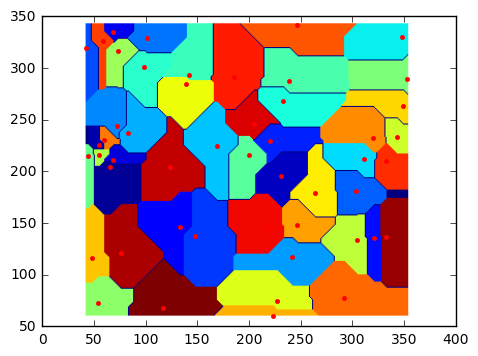

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

with open(path+'input6.txt','r') as file:
    coordinates=file.readlines()
    
coordinates=np.array([coordinate.split(', ') for coordinate in coordinates],dtype=int)
xmin=min(coordinates[:,0])
xmax=max(coordinates[:,0])
ymin=min(coordinates[:,1])
ymax=max(coordinates[:,1])

xcoords=np.tile(np.arange(xmin,xmax+1),((ymax-ymin+1),1))
ycoords=np.tile(np.arange(ymin,ymax+1),((xmax-xmin+1),1)).transpose()
                
distances=[abs(coordinate[0]-xcoords)+abs(coordinate[1]-ycoords) for coordinate in coordinates]

min_distances=np.argmin(distances,axis=0)+1

only_one=np.sum(np.min(distances,axis=0)==distances, axis=0)==1
closest_coordinate=min_distances*only_one



edges=set(closest_coordinate[0,:])|set(closest_coordinate[-1,:])|set(closest_coordinate[:,0])|set(closest_coordinate[:,-1])
not_edges=set(closest_coordinate.flatten())-edges
print('Part 1: %i' %np.max([sum(sum(closest_coordinate==a)) for a in not_edges]))


plt.imshow(closest_coordinate, aspect='equal', extent=(xmin,xmax,ymin,ymax),origin=lower)
plt.plot(coordinates[:,0],coordinates[:,1] ,'r.')

Part 2: 41605


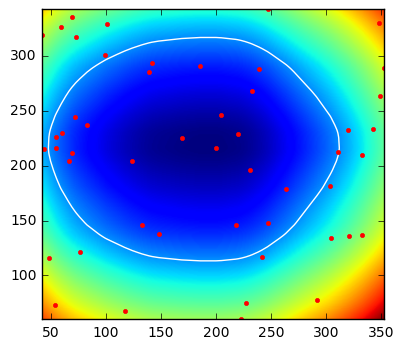

In [13]:
sum_coordinates=np.sum(distances,axis=0)

print('Part 2: %i'%sum(sum(sum_coordinates<10000)))

      
plt.imshow(sum_coordinates, aspect='equal', extent=(xmin,xmax,ymin,ymax),origin=lower)
plt.contour(sum_coordinates,[10000], colors=['w'],extent=(xmin,xmax,ymin,ymax))
plt.plot(coordinates[:,0],coordinates[:,1] ,'r.')


<a href='#top'>Back to top</a>
<a id='day7'></a>
<h2> Day 7 </h2>

In [14]:
with open(path+'input7.txt','r') as file:
    instructions=file.readlines()

a=np.array([re.findall('[A-Z]',i[1:]) for i in instructions])

completed=''
to_complete=set(a.flatten())
for i in range(len(to_complete)):
    options=set()
    for char in to_complete:
        needed=[entry[0] for entry in a if entry[1]==char]
        if set(needed).issubset(completed):
            options.add(char)
    completed+=min(options)
    to_complete.remove(min(options))

print('Part 1: %s' %completed)


completed=''
time_needed=60+np.arange(1,27)
to_complete=set(a.flatten())
workers_available=5
time=0
active=set()
while len(to_complete)>0:
    options=set()
    for char in np.sort(list(to_complete)):
        needed=[entry[0] for entry in a if entry[1]==char]
        if set(needed).issubset(completed):
            options.add(char)
    for char in sorted(options):
        if char not in active and workers_available>0:
            workers_available-=1
            active.add(char)
    min_time_needed=min([time_needed[ord(char)-65] for char in active])   
    for char in sorted(active):
        time_needed[ord(char)-65]-=min_time_needed
        if not time_needed[ord(char)-65]:
            workers_available+=1
            completed+=char
            to_complete.remove(char)
            active.remove(char)
    time+=min_time_needed

print('Part 2: %i' %time)


Part 1: GLMVWXZDKOUCEJRHFAPITSBQNY
Part 2: 1105


<a href='#top'>Back to top</a>
<h2 id='day8'> Day 8 </h2>

In [15]:
tree=np.loadtxt(path+'input8.txt',dtype=int)

#tree=[2, 3, 0, 3, 10, 11, 12, 1, 1, 0, 1, 99, 2, 1, 1, 2]

def untangle(tree):
    metadata=[]
    child_values=[]
    n_child_nodes=tree[0]
    n_metadata_entries=tree[1]
    processed_lenght=2
    for i in range(n_child_nodes):
        child_lenght,child_metadata,child_value=untangle(tree[processed_lenght:])
        processed_lenght+=child_lenght
        metadata+=child_metadata
        child_values+=[child_value]
    node_lenght=processed_lenght+n_metadata_entries
    metadata_entries=tree[processed_lenght:node_lenght]
    metadata+=[metadata_entries]
    if n_child_nodes==0:
        value=sum(metadata_entries)
    else:
        value=sum([child_values[i-1] for i in metadata_entries if i <= n_child_nodes])
    return node_lenght,metadata,value
        
l,m,v=untangle(tree)

answer=sum([sum(x) for x in m])
print('Part 1: %i' %answer)

print('Part 2: %i' %v)

Part 1: 41760
Part 2: 25737


<a href='#top'>Back to top</a>
<h2 id='day9'> Day 9 </h2>

In [16]:
from collections import deque
with open(path+'input9.txt','r') as f:
    rules=f.read().split()


#rules='10 players; last marble is worth 1618 points'.split()

players=int(rules[0])
last_marble=int(rules[6])
score=np.zeros(players,dtype=int)

marbles_placed=deque([0])

def place_marble(marble,marbles_placed,score,players):
    if marble%23:
        marbles_placed.rotate(2)
        marbles_placed.append(marble)
    else:
        player=marble%players
        score[player]+=marble
        marbles_placed.rotate(-7)
        removed_marble=marbles_placed.pop()
        score[player]+=removed_marble
    return marbles_placed,score,players
    

for marble in range(1,last_marble+1):
    marbles_placed,score,players=place_marble(marble,marbles_placed,score,players)

print('Part 1: %i'%max(score))    

for marble in range(last_marble+1,(last_marble*100)+1):
    marbles_placed,score,players=place_marble(marble,marbles_placed,score,players)
    
print('Part 2: %i'%max(score))


Part 1: 396136
Part 2: 3183301184


<a href='#top'>Back to top</a>
<h2 id='day10'> Day 10 </h2>

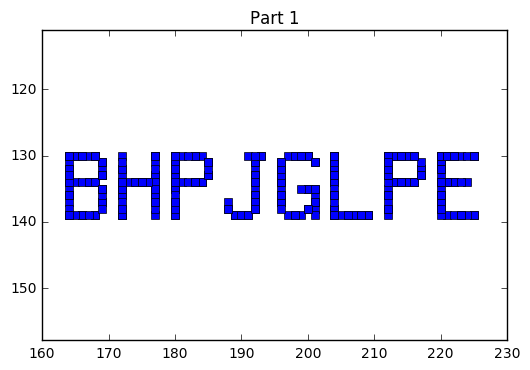

Part 2: 10831


In [17]:
with open(path+'input10.txt','r') as f:
    points=f.readlines()

points=np.array([re.findall('-?\d+',point) for point in points],dtype=int)

max_time=-2*int(points[0,0]/points[0,2])
time=range(0,max_time)

points_in_time=np.array([points[:,:2]+points[:,2:]*i for i in time])
boundl=np.min(points_in_time[:,:,0],axis=1)
boundr=np.max(points_in_time[:,:,0],axis=1)

min_time=np.argmin(boundr-boundl)

plt.plot(points_in_time[min_time,:,0],points_in_time[min_time,:,1],'s')
plt.axis('equal')
plt.gca().invert_yaxis()
plt.title('Part 1')

plt.show()

print('Part 2: %i' %min_time)

<a href='#top'>Back to top</a>
<h2 id='day11'> Day 11 </h2>

In [18]:
grid_serial_number=3628
#grid_serial_number=42

#Find the fuel cell's rack ID, which is its X coordinate plus 10.
#Begin with a power level of the rack ID times the Y coordinate.
#Increase the power level by the value of the grid serial number (your puzzle input).
#Set the power level to itself multiplied by the rack ID.
#Keep only the hundreds digit of the power level (so 12345 becomes 3; numbers with no hundreds digit become 0).
#Subtract 5 from the power level.

grid=np.zeros((300,300),dtype=int)
x=np.arange(1,301)
y=np.arange(1,301)

rack_id=(grid+x+10).transpose()
grid=rack_id*y
grid+=grid_serial_number
grid=grid*rack_id
grid=(grid//100)%10
grid-=5

def rolling_sum(a, n=3) :
    # modified from https://stackoverflow.com/questions/28288252/fast-rolling-sum
    ret = np.cumsum(a, axis=0, dtype=int)
    ret[n:, :] = ret[n:, :] - ret[:-n, :]
    ret = np.cumsum(ret, axis=1, dtype=int)
    ret[:, n:] = ret[:, n:] - ret[:, :-n]
    return ret[n - 1:, n - 1:]

square_power_level=rolling_sum(grid,3)

x,y=np.unravel_index(square_power_level.argmax(), square_power_level.shape)
print('Part 1: %i,%i' %(x+1,y+1) )

results={}
for size in range(1,300):
    square_power_level=rolling_sum(grid,size)
    max_power=square_power_level.max()
    x,y=np.unravel_index(square_power_level.argmax(), square_power_level.shape)
    results[max_power]=(x,y,size)

x,y,size=results[max(results)]
print('Part 2: %i,%i,%i' %(x+1,y+1,size) )

Part 1: 216,12
Part 2: 236,175,11


<a href='#top'>Back to top</a>
<h2 id='day12'> Day 12 </h2>

In [19]:
with open(path+'input12.txt','r') as f:
    pots=f.readlines()
    
current_pots=''.join(re.findall('[#,.]',pots[0]))
current_pots=re.sub(r'^\.*|\.*$',r'....',current_pots)
instructions=[''.join(re.findall('[#,.]',pot)) for pot in pots[2:]]
results={}
for instr in instructions:
    results[instr[:-1]]=instr[-1]
leftmost=current_pots.find('#')
first_pot=leftmost-4

def grow_plants(current_pots, first_pot):
    new_generation=''.join([results[current_pots[i:i+5]]  if (current_pots[i:i+5] in results) else '.' for i in range(len(current_pots)-4)])
    leftmost=new_generation.find('#')
    first_pot+=leftmost-2
    new_generation=re.sub(r'^\.*|\.*$',r'....',new_generation)
    return new_generation, first_pot

for generation in range(20):
    current_pots, first_pot=grow_plants(current_pots, first_pot)

current_pots=current_pots.strip('.')
sum_all=0
for i in range(first_pot,first_pot+len(current_pots)):
    if current_pots[i-first_pot]=='#':
        sum_all+=i
        
print('Part 1: %i'%sum_all)


Part 1: 3059


In [20]:
# Restart all the values
current_pots=''.join(re.findall('[#,.]',pots[0]))
current_pots=re.sub(r'^\.*|\.*$',r'....',current_pots)
previous_config=[]
previous_first_pot=[]
leftmost=current_pots.find('#')
first_pot=leftmost-4

for generation in range(1000):
    previous_config+=[current_pots]
    previous_first_pot+=[first_pot]
    current_pots, first_pot=grow_plants(current_pots, first_pot)
    if current_pots in previous_config:
        first_pot_shift=first_pot-previous_first_pot[previous_config.index(current_pots)]
        break
        
# The same pot configuration repeats every generation from the last one used.
# A more general form for repeat after more than just one generation is not implemented here
total_first_pot_shift=first_pot_shift*(int(50e9)-generation-1)
     
current_pots=current_pots.strip('.')
sum=0
for i in range(first_pot,first_pot+len(current_pots)):
    if current_pots[i-first_pot]=='#':
        sum+=i
        sum+=total_first_pot_shift
print('Part 2: %i'%sum)

Part 2: 3650000001776
